# 주제 : 새로 출시된 게임, 전문가 리뷰 믿고 바로 구매해도 될까요? 직접 데이터로 분석하고 판단해 보자!
----------

## 실습 가이드
    1. 데이터를 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Video Game Sales with Ratings을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    Video_Games_Sales_as_at_22_Dec_2016.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## 최종 목표
    - 흥미로운 일상적인 데이터 분석해 보기
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해

---

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


In [3]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### 문제 4. 결손 데이터 데이터프레임에서 제거하기


In [5]:
# dropna() 메소드를 이용하여 결손 데이터가 포함된 row를 제거
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


### 문제 5. 수치형 데이터의 히스토그램 확인하기


In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [8]:
pip install seaborn==0.11.0  

Note: you may need to restart the kernel to use updated packages.


In [9]:
import seaborn as sns

In [10]:
print(sns.__version__)

0.11.0


<AxesSubplot:xlabel='Year_of_Release', ylabel='Count'>

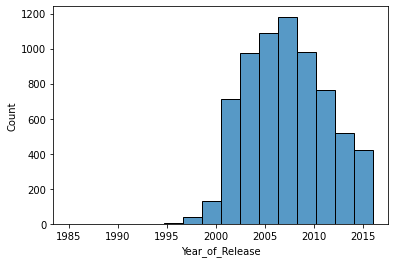

In [11]:
# Seaborn의 histplot()을 이용하여 히스토그램 확인
# 값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인
sns.histplot(x = 'Year_of_Release', data = df, bins = 16)


<AxesSubplot:xlabel='Global_Sales'>

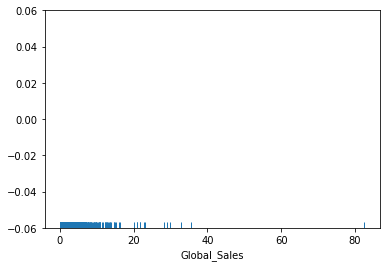

In [12]:
sns.rugplot(x = 'Global_Sales', data = df)

In [13]:
gs = df['Global_Sales'].quantile(0.99)

In [14]:
df = df[df['Global_Sales'] < gs]

<AxesSubplot:xlabel='Global_Sales', ylabel='Count'>

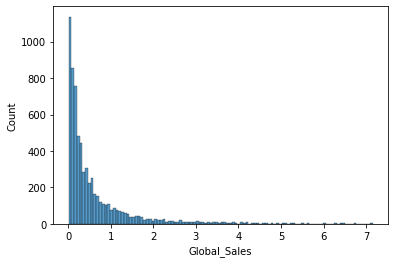

In [15]:
sns.histplot(x = 'Global_Sales', data = df)

<AxesSubplot:xlabel='Global_Sales', ylabel='Count'>

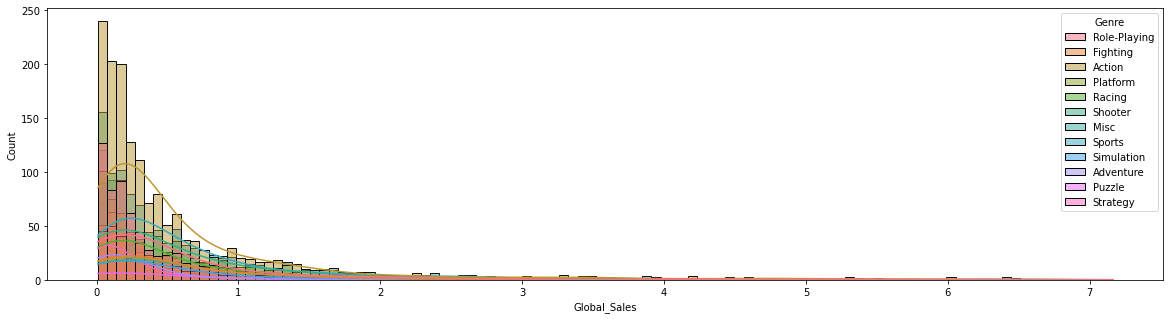

In [18]:
fig = plt.figure(figsize = (20,5))
sns.histplot(x = 'Global_Sales', hue = 'Genre', kde = True, data = df)

### 문제 6. 수치형 데이터와 전국 판매량의 Jointplot 분석하기

In [22]:
df['User_Score'] = df['User_Score'].apply(float)

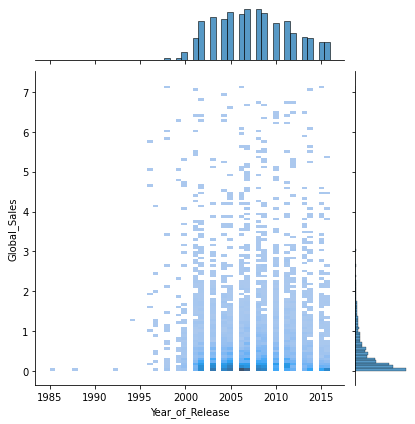

In [25]:
# 수치형 데이터와 전국 판매량의 관계를 Seaborn의 jointplot()으로 시각화/분석
sns.jointplot(x = 'Year_of_Release', y = 'Global_Sales', data = df, kind = 'hist')

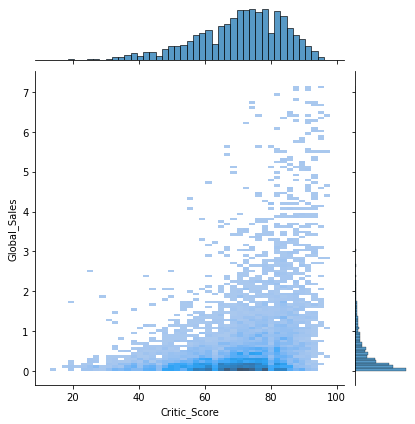

In [26]:
sns.jointplot(x = 'Critic_Score', y = 'Global_Sales', data = df, kind = 'hist')

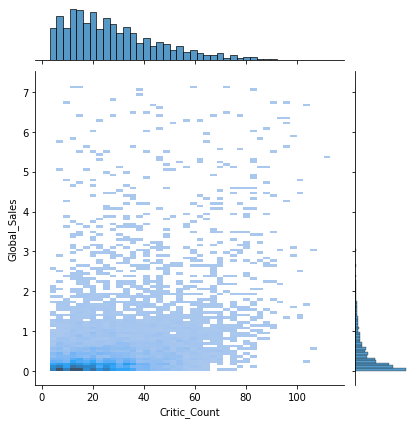

In [29]:
sns.jointplot(x = 'Critic_Count', y = 'Global_Sales', data = df, kind = 'hist')

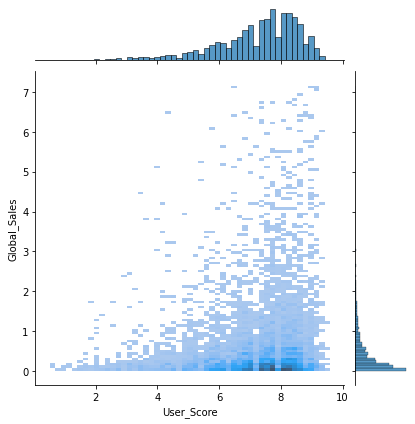

In [27]:
sns.jointplot(x = 'User_Score', y = 'Global_Sales', data = df, kind = 'hist')

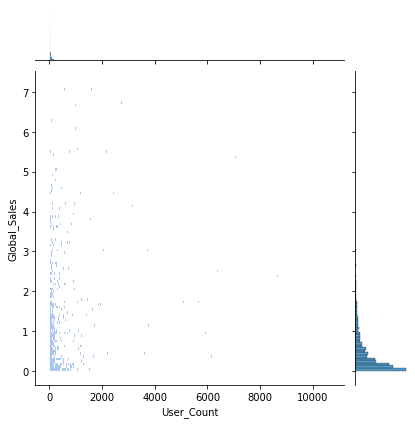

In [30]:
sns.jointplot(x = 'User_Count', y = 'Global_Sales', data = df, kind = 'hist')

### 문제 7. 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

In [31]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

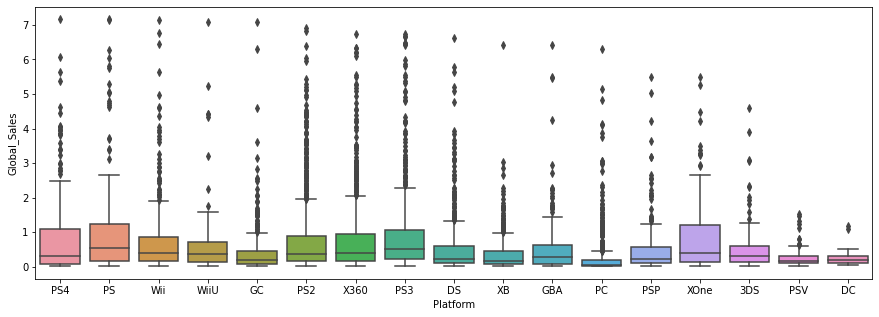

In [37]:
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석
fig = plt.figure(figsize = (15, 5))
sns.boxplot(x = 'Platform', y = 'Global_Sales', data = df)

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

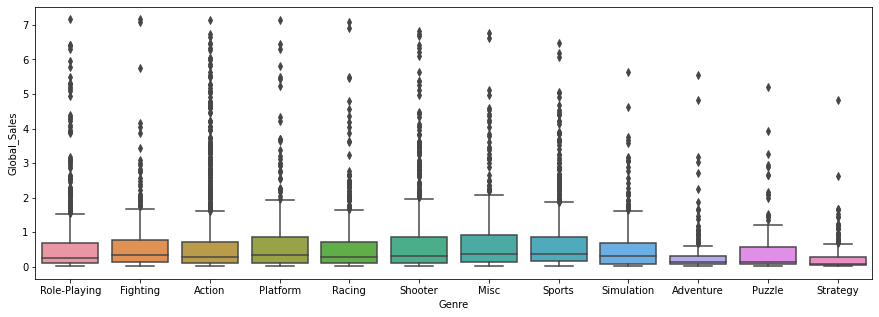

In [40]:
fig = plt.figure(figsize = (15, 5))
sns.boxplot(x = 'Genre', y = 'Global_Sales', data = df)

<AxesSubplot:xlabel='Publisher', ylabel='Global_Sales'>

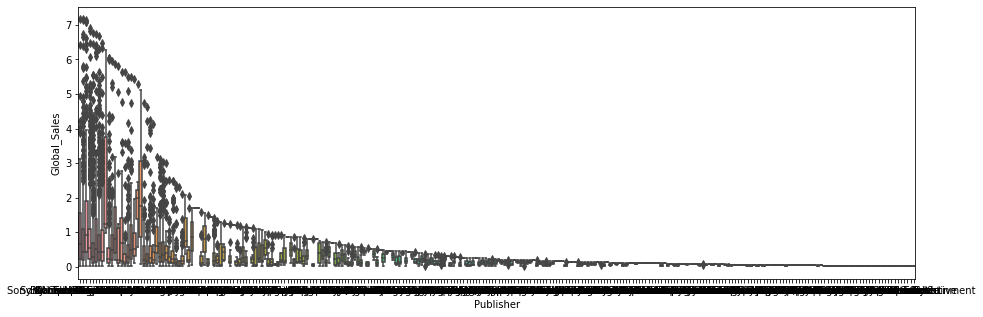

In [41]:
fig = plt.figure(figsize = (15, 5))
sns.boxplot(x = 'Publisher', y = 'Global_Sales', data = df)

<AxesSubplot:xlabel='Developer', ylabel='Global_Sales'>

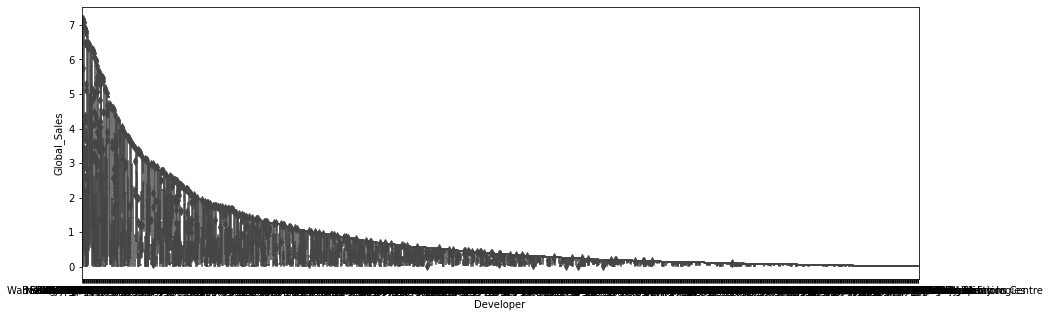

In [42]:
fig = plt.figure(figsize = (15, 5))
sns.boxplot(x = 'Developer', y = 'Global_Sales', data = df)

### 문제 8. 전문가 평점과 사용자 평점의 차이 분석하기

In [43]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

<AxesSubplot:ylabel='Critic_Score'>

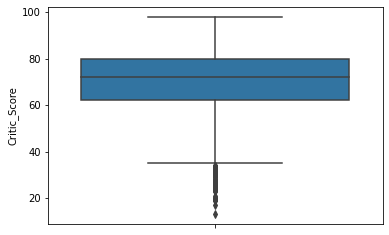

In [45]:
# Seaborn 시각화로 전문가 평점과 사용자 평점의 통계 비교/분석하기
# Hint) 두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교
# Tip) 별도의 DataFrame을 구성하여 boxplot으로 비교하면 편리함
sns.boxplot(y = 'Critic_Score', data = df)

<AxesSubplot:ylabel='User_Score'>

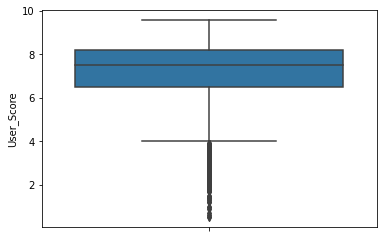

In [46]:
sns.boxplot(y = 'User_Score', data = df)

In [49]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score' : 'Score'}, axis = 1, inplace = True)
critic_score['ScoreBy'] = 'Critics'

In [62]:
user_score = df[['User_Score']].copy() * 10
user_score.rename({'User_Score' : 'Score'}, axis = 1, inplace = True)
user_score['ScoreBy'] = 'Users'

In [65]:
scores = pd.concat([critic_score, user_score])
scores

,Score,ScoreBy
105,87.0,Critics
106,96.0,Critics
107,95.0,Critics
109,91.0,Critics
110,88.0,Critics
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


<AxesSubplot:xlabel='ScoreBy', ylabel='Score'>

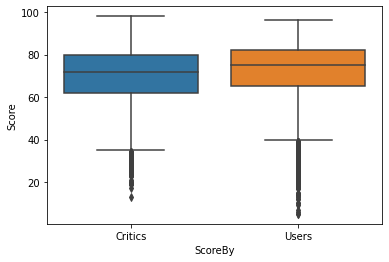

In [69]:
sns.boxplot(x = 'ScoreBy', y = 'Score', data = scores)

### 문제 9. 수치형 데이터간의 상관성 시각화하기

<AxesSubplot:>

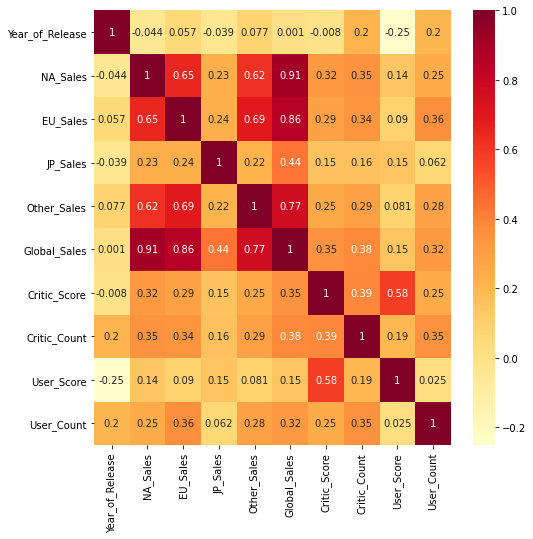

In [72]:
# Correlation Heatmap 시각화하기
fig = plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlOrRd')

## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 10. 범주형 데이터에서 소수 범주를 others로 대체하기

In [73]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
# Hint) value_counts()를 이용하여 범주별 개수를 확인
pb = df['Publisher'].value_counts()

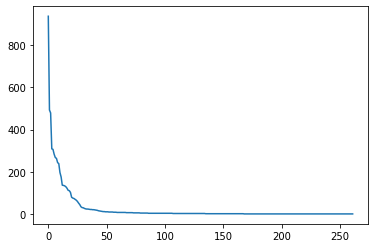

In [75]:
plt.plot(range(len(pb)), pb)

In [78]:
df['Publisher'] = df['Publisher'].apply(lambda s: s if s not in pb[20:] else 'others')

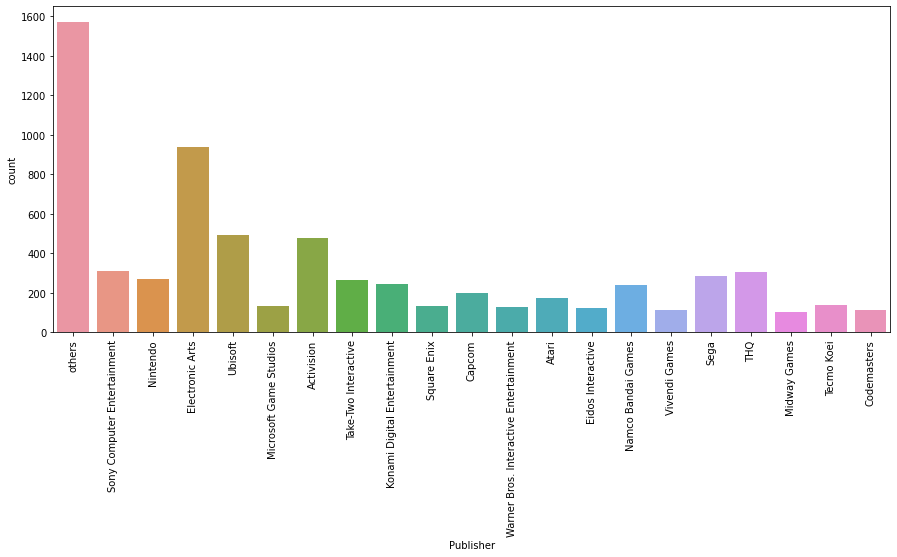

In [80]:
fig = plt.figure(figsize = (15,6))
sns.countplot(x = 'Publisher', data = df)
plt.xticks(rotation = 90)
plt.show()

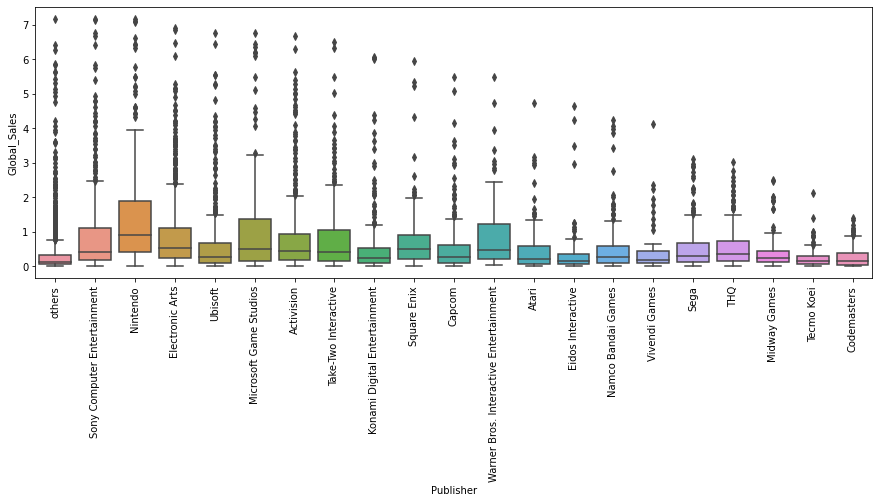

In [82]:
fig = plt.figure(figsize = (15, 5))
sns.boxplot(x = 'Publisher', y = 'Global_Sales', data = df)
plt.xticks(rotation = 90)
plt.show()

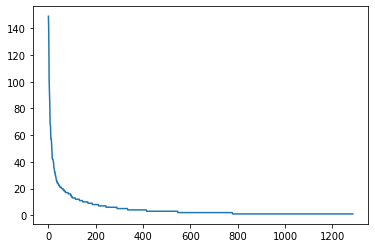

In [84]:
dev = df['Developer'].value_counts()
plt.plot(range(len(dev)), dev)

In [86]:
df['Developer'] = df['Developer'].apply(lambda s: s if s not in dev[20:] else 'others')

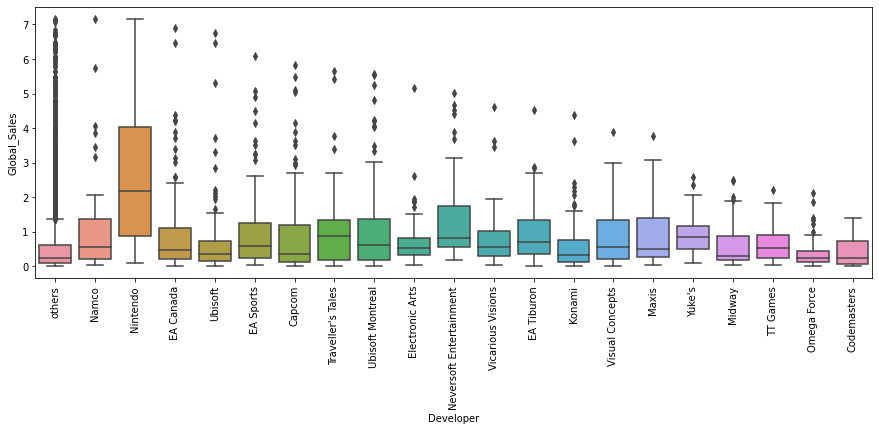

In [87]:
fig = plt.figure(figsize = (15, 5))
sns.boxplot(x = 'Developer', y = 'Global_Sales', data = df)
plt.xticks(rotation = 90)
plt.show()

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리


In [88]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [91]:
X_cat = df[['Platform', 'Genre', 'Publisher']]
X_cat = pd.get_dummies(X_cat, drop_first = True)
X_cat

,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
105,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
106,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16677,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16696,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16700,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Step 4. 전국 판매량 Regression 모델 학습하기

### 문제 12. 전국 판매량 추정을 위한 입출력 데이터 구성하기


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [94]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [102]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

X = pd.concat([X_scaled, X_cat], axis = 1) 
y = df['Global_Sales']
X.head(3)

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
105,1.797863,1.222094,1.548409,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
106,-2.239604,1.873578,-0.719392,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
107,-0.339619,1.801190,2.339502,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state  = 1)

### 문제 13. XGBoost 모델 생성/학습하기

In [104]:
from xgboost import XGBRegressor

In [109]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:24:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 14. Linear Regression 모델 생성/학습하기

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 15. 모델 학습 결과 평가하기

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [113]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE : ', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE : ', sqrt(mean_squared_error(y_test, pred_xgb)))
print('LR MAE : ', mean_absolute_error(y_test, pred_lr))
print('LR RMSE : ', sqrt(mean_squared_error(y_test, pred_lr)))

XGB MAE :  0.4299885125588359
XGB RMSE :  0.7089142689494845
LR MAE :  0.5051887942264967
LR RMSE :  0.7640747686370057


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


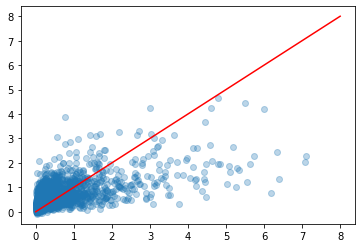

In [120]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha = 0.3)
plt.plot([0,8], [0,8], '-r')

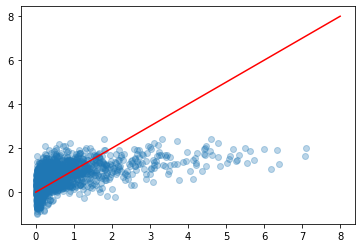

In [121]:
plt.scatter(y_test, pred_lr, alpha = 0.3)
plt.plot([0,8], [0,8], '-r')

### 문제 17. XGBoost 모델의 Feature Importance 시각화하기

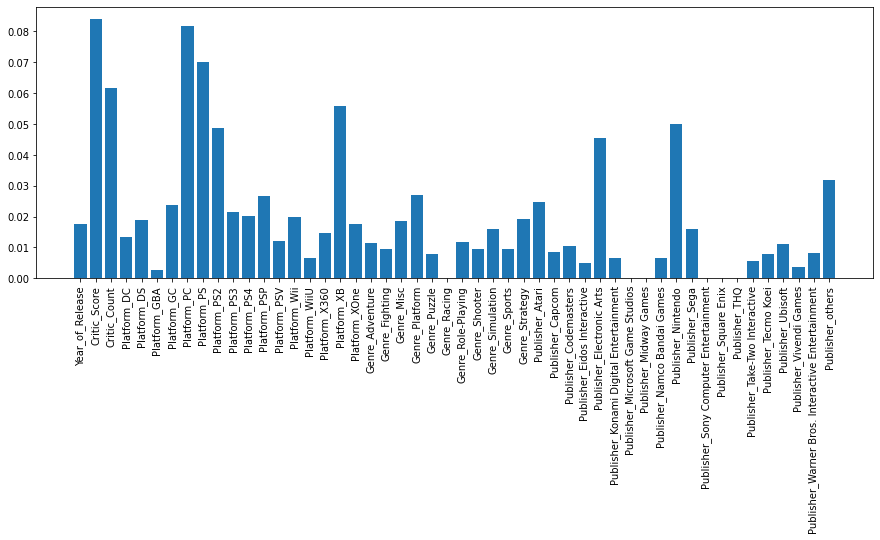

In [123]:
fig = plt.figure(figsize = (15, 5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

## Step 5. 유저 평점 Regression 모델 학습하기

### 문제 18. 유저 평점 추정을 위한 입출력 데이터 구성하기


In [ ]:
# 유저 평점 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화
scaler = 
X = 
y = 

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 





### 문제 19. XGBoost 모델 생성/학습하기

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = 




### 문제 20. Linear Regression 모델 생성/학습하기

In [ ]:
# LinearRegression 모델 생성/학습
model_lr = 




### 문제 21. 모델 학습 결과 평가하기

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = 
pred_lr = 





### 문제 22. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기






### 문제 23. XGBoost 모델의 Feature Importance 시각화하기